# Similarity-based Learning

Similiarity-based approaches in machine learning come from the idea that the best way to make predictions is simply to look at what has worked in the past and predict the same thing again. The fundamental concepts required to build a system based on this idea are feature spaces and measures of similarity.

## Reading

1. Chapter 5 of [Fundamentals of Machine Learning for Predictive Data Analytics](https://mitpress.mit.edu/books/fundamentals-machine-learning-predictive-data-analytics)
3. [Chapter 5 Slides 'A'](http://131.96.197.204/~pmolnar/mlbook/BookSlides_5A_Similarity-based-Learning.pdf) (internal)
3. [Chapter 5 Slides 'B'](http://131.96.197.204/~pmolnar/mlbook/BookSlides_5B_Similarity-based-Learning.pdf) (internal)

Slides are posted on the internal server http://131.96.197.204/~pmolnar/mlbook


## What is a metric?

The "distance" $d$ between two points in a vector space must satisfy the following requirements:
* It is **non-negative**: $d(x,y) \geq 0$ for all $x$, $y$, with $d(x,y) = 0$ if and only if $x = y$
* It is **symmetric**: $d(x,y) = d(y,x)$
* It satisfies the **triangle inequality**: $d(x,y) \leq d(x,z) + d(z,y)$

Some common measures of distance:

### Euclidean distance

This is perhaps the most commonly used distance metric: $d(X,Y) = \sqrt{(X_0-Y_0)^2 + (X_1-Y_1)^2}$.

In [16]:
import numpy as np
import math as ma
import matplotlib.pyplot as plt
%matplotlib inline

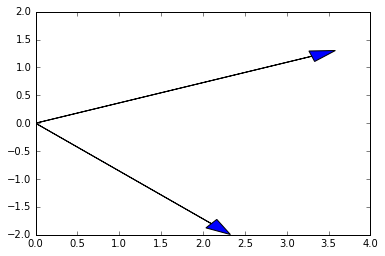

In [28]:
X = np.array([3.3, 1.2])
Y = np.array([2.1, -1.8])

plt.arrow(0,0,*X, head_width=0.2);
plt.arrow(0,0,*Y, head_width=0.2);
plt.xlim([0, 4]);
plt.ylim([-2,2]);
plt.show();

In [18]:
# Euclidean distance manually:
ma.sqrt(np.sum((X-Y)**2))

3.2310988842807022

In [15]:
# numpy norm:
np.linalg.norm(X-Y)

3.2310988842807022

### More general Minkowski distance

In a d-dimensional vector space, the Minkowski distance of order $p$ is defined as:

$d_p(X,Y) = \left(\sum_{i=1}^{d} \left|X_i - Y_i\right|^p \right)^{1/p}$

The Euclidean distance is a special case of the Minkowski distance with $p=2$. 

Some other common cases include:

* The Manhattan distance: $p = 1$
* The Chebyshev distance: $p = \infty$, where $d_\infty(X,Y) = \max_{i = 0,\ldots,n}\left| X_i - Y_i \right|$

In [23]:
import scipy.spatial.distance as dst

In [25]:
# Manhattan distance
dst.cdist(np.expand_dims(X, axis=0),np.expand_dims(Y, axis=0),'cityblock')

array([[ 4.2]])

In [26]:
# Chebyshev distance
dst.cdist(np.expand_dims(X, axis=0),np.expand_dims(Y, axis=0),'chebyshev')

array([[ 3.]])

## Scaling the Axes

The Euclidean distance can be written in (suggestive) vector notation as:

$d^2(X,Y) = (X-Y)^T I_{n \times n} (X-Y)$

Instead of the $n \times n$ identity matrix, we could use and positive definite matrix. 

A **positive definite** matrix is defined as a matrix $M$ for which $z^T M z \geq 0$ for all real vectors $z$, with equality only if $z$ is the vector of all zeros.

We can use this matrix to appropriately rescale the axes, for example to correct for high variance along a given dimension in our feature space: this gives us the Mahalanobis metric, 

$d_M(X,Y) = (X-Y)^T \Sigma^{-1} (X-Y)$,

where $\Sigma$ is the covariance matrix of your data points.